### 考虑如何生成函数，机器生成具体的函数

In [2]:
from sklearn.datasets import load_boston

In [5]:
data = load_boston()

    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.

In [8]:
X, y = data['data'],data['target']

In [11]:
X[0],y[0]

(array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]), 24.0)

In [12]:
data['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [35]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

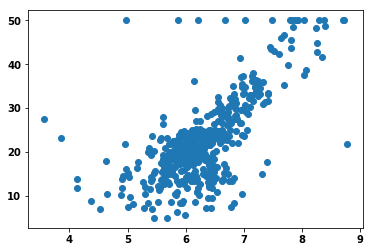

In [37]:
draw_rm_and_price()

In [38]:
import random

In [39]:
def price(rm,k,b):
    """f(x) = kx+b"""
    return k * rm + b

In [51]:
k = random.randint(-100,100)
b = random.randint(-100,100)

In [41]:
X_rm = X[:,5]

In [59]:
price_predict = [price(r,k,b) for r in X_rm]

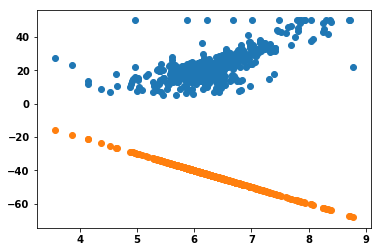

In [60]:
draw_rm_and_price()
plt.scatter(X_rm,price_predict)
# 散点图 plt.scatter(x,y)
# 写在同一块，放在一个图

In [73]:
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i,y_hat_i in zip(list(y),list(y_hat)))/len(list(y))
    

In [74]:
loss(price_predict,y)

66.51842033003953

## 1st random ajust

In [90]:
X_rm = X[:,5]
trying_times = 100

min_loss = float("inf")
best_k,best_b = None,None
for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_predict = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(price_predict,y)
    if current_loss<min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
    print('current_loss:{},y = {} * x + {}'.format(current_loss,k,b))
print('min_loss:{},y = {} * x + {}'.format(min_loss,best_k,best_b))

current_loss:674.677683186901,y = 1.0722894356544117 * x + 40.27465027037775
current_loss:108465.10137975623,y = 65.91083559491034 * x + -64.84187631321612
current_loss:326648.5531960764,y = 83.09702365456465 * x + 69.42695980867055
current_loss:231110.67751677975,y = -61.230717056808714 * x + -70.8070708808652
current_loss:165008.99175097788,y = -52.01147312784862 * x + -54.481757105514795
current_loss:358835.36809159996,y = 98.63259778900152 * x + -1.6504590402890358
current_loss:196562.17908545566,y = 68.28929783906415 * x + 34.71269070548615
current_loss:268721.2209657197,y = -73.07993419594993 * x + -33.3078827753194
current_loss:8084.580629764168,y = -24.22567133937075 * x + 88.21599905820443
current_loss:1080.002388695954,y = 8.04575383702253 * x + -60.21647034203943
current_loss:335596.29324252484,y = -75.61318799633247 * x + -78.47492131870221
current_loss:759.5822600483775,y = -8.49306791855578 * x + 52.17157184732821
current_loss:61380.25251769976,y = -37.017846842564815 * x

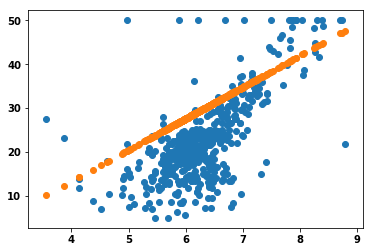

In [91]:
price_predict = [price(r,best_k,best_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_predict)

## 2nd direction ajusting 监督学习

In [104]:
import numpy as np
import math

In [140]:
X_rm = X[:,5]
trying_times = 10000

# min_loss = float("inf")
min_loss = 100000
best_k,best_b = None,None
k = random.random() * 200 - 100
b = random.random() * 200 - 100

direction = [
    (1,1),(1,-1),(-1,1),(-1,-1)
]
current_direction = random.choice(direction)

for i in range(trying_times):
    k = current_direction[0]*np.log(1+current_loss/2)
    b = current_direction[1]*np.log(1+current_loss/2)
    price_predict = [price(r,k,b) for r in X_rm]
    
    current_loss = loss(price_predict,y)
    if current_loss<min_loss:
        min_loss = current_loss
        best_b,best_k = b,k
        print('{} time: update_loss:{},y = {} * x + {}'.format(i,current_loss,k,b))
    else:current_direction = random.choice(list(set(direction)-{current_direction}))
    
print('min_loss:{},y = {} * x + {}'.format(min_loss,best_k,best_b))

0 time: update_loss:1139.149811494291,y = 7.634680777513128 * x + 7.634680777513128
1 time: update_loss:609.0398261440575,y = 6.3466444591006805 * x + 6.3466444591006805
2 time: update_loss:415.95136939523076,y = 5.7220149583925695 * x + 5.7220149583925695
3 time: update_loss:318.9781269764152,y = 5.342217904036918 * x + 5.342217904036918
4 time: update_loss:260.6758233777437,y = 5.0782257999880285 * x + 5.0782257999880285
5 time: update_loss:221.39244580311905,y = 4.877773480597375 * x + 4.877773480597375
6 time: update_loss:192.79110508455435,y = 4.715782890835204 * x + 4.715782890835204
7 time: update_loss:170.79563906653917,y = 4.578780547822356 * x + 4.578780547822356
8 time: update_loss:153.20716031713846,y = 4.458962438608101 * x + 4.458962438608101
9 time: update_loss:138.75516596002967,y = 4.351613562188974 * x + 4.351613562188974
10 time: update_loss:126.67052815333932,y = 4.253874788877109 * x + 4.253874788877109
11 time: update_loss:116.47304050817431,y = 4.1641079113408885

2483 time: update_loss:54.935303054017346,y = 4.35432823994304 * x + -4.35432823994304
2937 time: update_loss:54.934218037115976,y = 4.350078321720596 * x + -4.350078321720596
8060 time: update_loss:54.93420829750176,y = 4.345418586715367 * x + -4.345418586715367
min_loss:54.93420829750176,y = 4.345418586715367 * x + -4.345418586715367


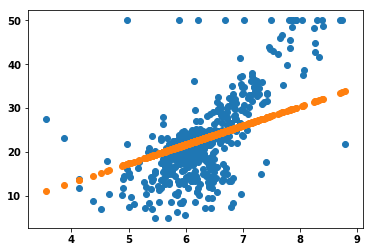

In [141]:
price_predict = [price(r,best_k,best_b) for r in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_predict)